Classification Dataset:
Description:

Data were extracted from images that were taken from genuine and forged banknote-like
specimens. For digitization, an industrial camera usually used for print inspection was used. The
final images have 400x 400 pixels. Due to the object lens and distance to the investigated object
gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were
used to extract features from images.


Attributes:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)


In [1]:
#Importing all the necessary libraries 

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Tavleen Bajwa\Desktop\ML IIITB\data_banknote_authentication.txt")

In [2]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


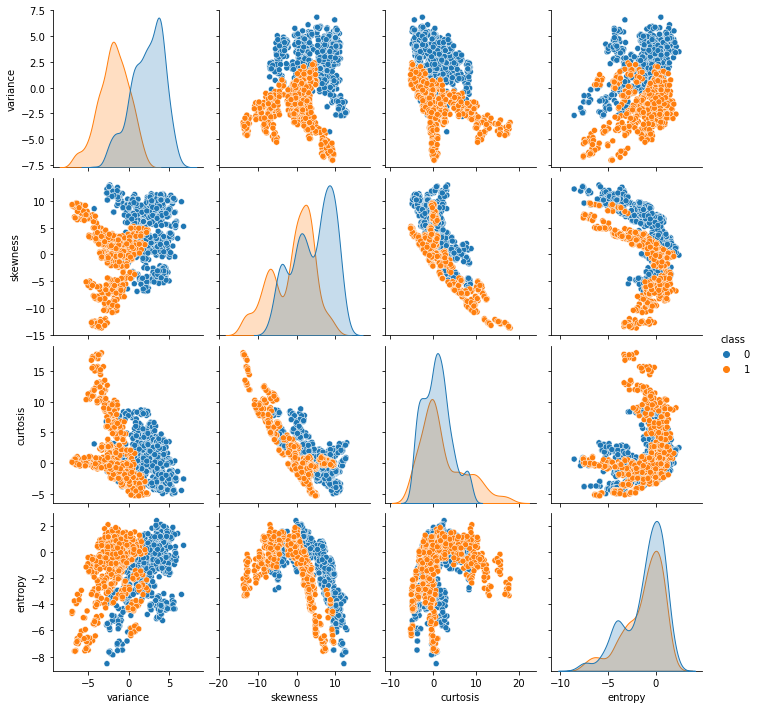

In [3]:
#Pairplot 
sns.pairplot(df,hue='class')

<AxesSubplot:>

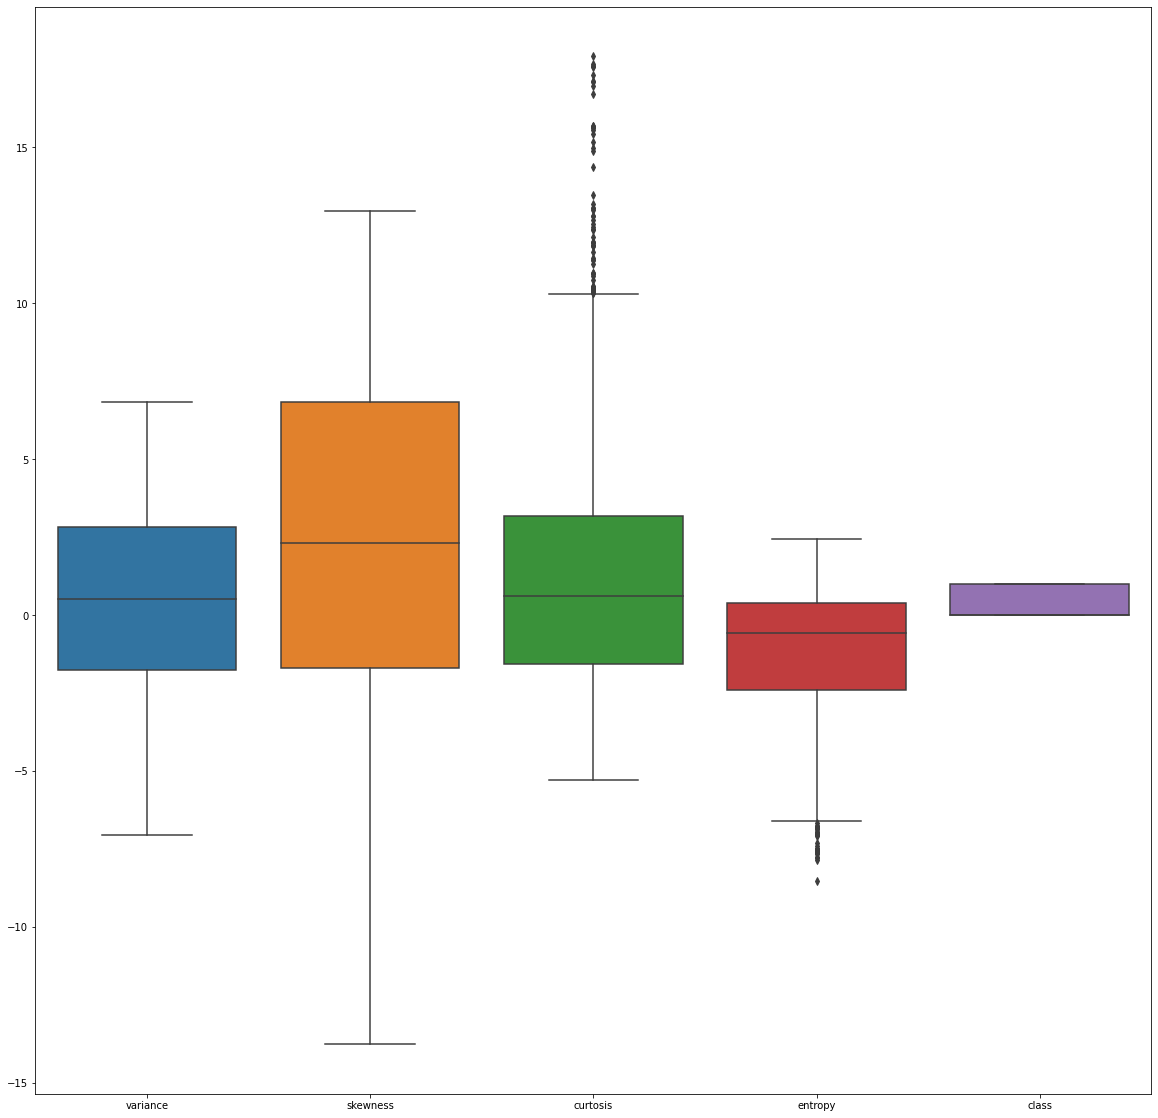

In [4]:
#Box plot of raw data
fig ,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

#The plots shows that all columns have values in range -10 to +10 
#curtosis has outliers 

In [5]:
#Chcek for Nan values 

df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
#Check for duplicated values 

df.duplicated().sum()

24

In [7]:
#Duplicate rows were removed 

df = df.drop_duplicates()

In [8]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [9]:
df.duplicated().sum()

0

<AxesSubplot:>

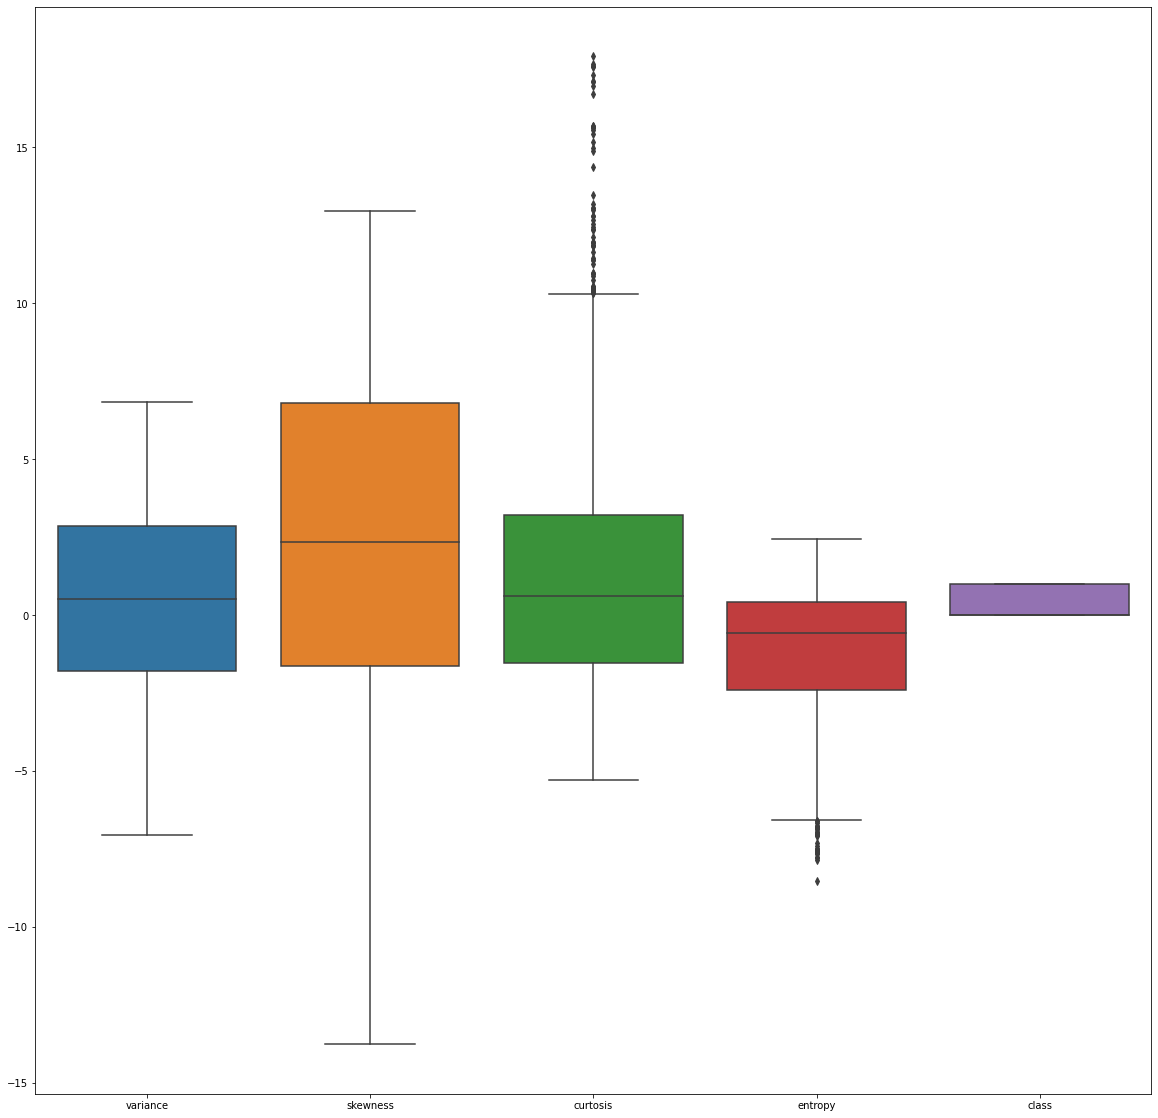

In [10]:
fig ,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

#  Distribution before preprocessing

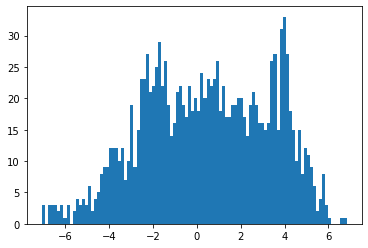

In [11]:
#Variance
plt.hist(df["variance"], bins=100)
plt.show()

#Bimodal distribution 

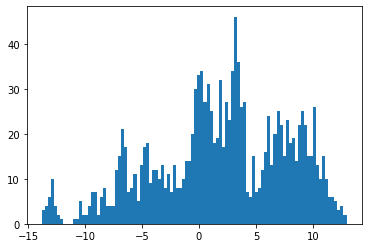

In [12]:
#skewness
plt.hist(df["skewness"], bins=100)
plt.show()


#Bimodal distribution

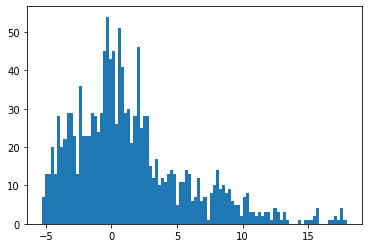

In [13]:
#curtosis
plt.hist(df["curtosis"], bins=100)
plt.show()


#Shows right skewed distribution

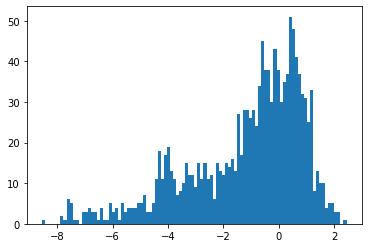

In [14]:
#entropy
plt.hist(df["entropy"], bins=100)
plt.show()


#Shows left skewed distribution

In [15]:
#Class for normalization

class MinMaxScaler:
    def __init__(self, minimum_elem, maximum_elem):
        self.minimum_elem = minimum_elem 
        self.maximum_elem = maximum_elem 
    
    def scale(self, x):
        return (x - self.minimum_elem)/(self.maximum_elem - self.minimum_elem)

In [16]:
#Class for standardization 

class Standardizer: 
    def __init__(self, mean, stdev):
        self.mean = mean 
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

# 1. Variance

In [17]:
#Normalization

In [18]:
variance_scaler = MinMaxScaler(df["variance"].min(),df["variance"].max())

In [19]:
variance_scaled = df["variance"].apply(variance_scaler.scale)

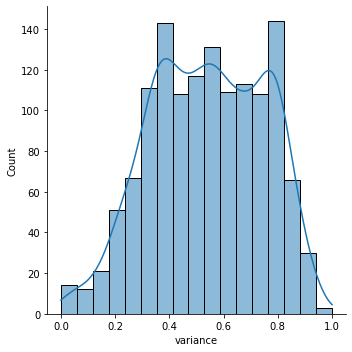

In [20]:
sns.displot(variance_scaled,kde=True )
plt.show()

In [21]:
#Standardization

In [22]:
std_variance = variance_scaled.apply(Standardizer(variance_scaled.mean(), variance_scaled.std()).scale)  


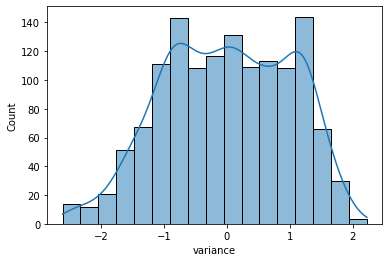

In [23]:
sns.histplot(std_variance, kde=True)
plt.show()

In [24]:
#Adding to new column 

In [25]:
df["variance_n"] = std_variance

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_19788\1333522955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["variance_n"] = std_variance


# 2. Skewness

In [26]:
#Normalization

In [27]:
skewness_scaler = MinMaxScaler(df["skewness"].min(),df["skewness"].max())

In [28]:
skewness_scaled = df["skewness"].apply(skewness_scaler.scale)

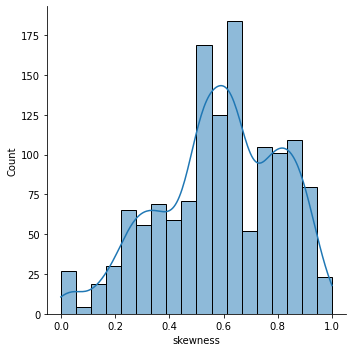

In [29]:
sns.displot(skewness_scaled,kde=True )
plt.show()

In [30]:
#Standardization

In [31]:
std_skewness = skewness_scaled.apply(Standardizer(skewness_scaled.mean(), skewness_scaled.std()).scale)  

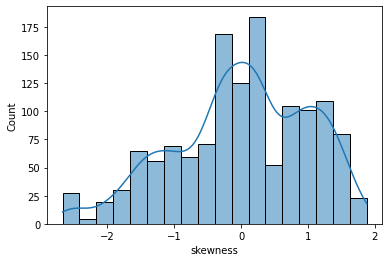

In [32]:
sns.histplot(std_skewness, kde=True)
plt.show()

In [33]:
#Adding to new column

In [34]:
df["skewness_n"] = std_skewness

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_19788\3247298544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["skewness_n"] = std_skewness


# 3. curtosis

In [35]:
#Normalization

In [36]:
curtosis_scaler = MinMaxScaler(df["curtosis"].min(),df["curtosis"].max())

In [37]:
curtosis_scaled = df["curtosis"].apply(curtosis_scaler.scale)

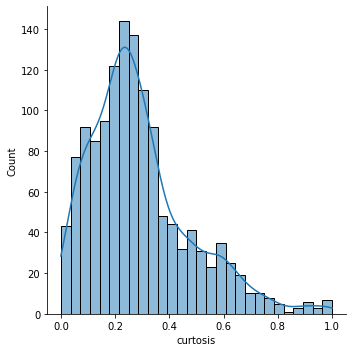

In [38]:
sns.displot(curtosis_scaled,kde=True )
plt.show()

In [39]:
#Standardization

In [40]:
std_curtosis = curtosis_scaled.apply(Standardizer(curtosis_scaled.mean(), curtosis_scaled.std()).scale)  

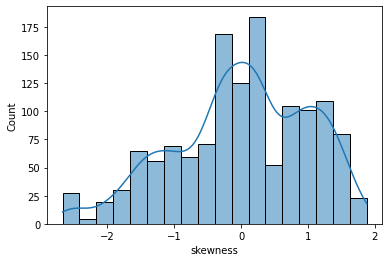

In [41]:
sns.histplot(std_skewness, kde=True)
plt.show()

In [42]:
#Adding to new column

In [43]:
df["curtosis_n"] = std_curtosis

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_19788\3921566095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["curtosis_n"] = std_curtosis


# 4. Entropy

In [44]:
#Normalization

In [45]:
entropy_scaler = MinMaxScaler(df["entropy"].min(),df["entropy"].max())

In [46]:
entropy_scaled = df["entropy"].apply(entropy_scaler.scale)

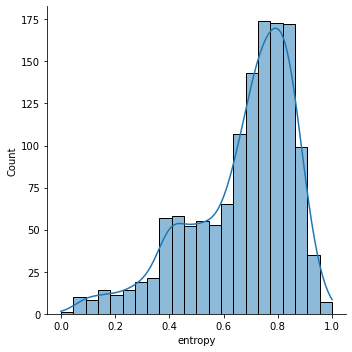

In [47]:
sns.displot(entropy_scaled,kde=True )
plt.show()

In [48]:
#Standardization

In [49]:
std_entropy = entropy_scaled.apply(Standardizer(entropy_scaled.mean(), entropy_scaled.std()).scale)  

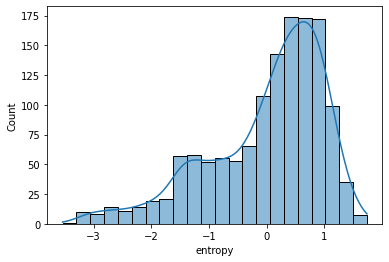

In [50]:
sns.histplot(std_entropy, kde=True)
plt.show()

In [51]:
#Adding to new column

In [52]:
df["entropy_n"] = std_entropy

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_19788\3534978009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["entropy_n"] = std_entropy


In [53]:
df

,variance,skewness,curtosis,entropy,class,variance_n,skewness_n,curtosis_n,entropy_n
0,3.62160,8.66610,-2.8073,-0.44699,0,1.109298,1.151392,-0.975167,0.346004
1,4.54590,8.16740,-2.4586,-1.46210,0,1.432151,1.066415,-0.894605,-0.140655
2,3.86600,-2.63830,1.9242,0.10645,0,1.194665,-0.774859,0.117971,0.611331
3,3.45660,9.52280,-4.0112,-3.59440,0,1.051664,1.297373,-1.253309,-1.162911
4,0.32924,-4.45520,4.5718,-0.98880,0,-0.040709,-1.084456,0.729657,0.086252
...,...,...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,-0.013848,-0.095396,-0.661607,0.292070
1368,-1.38870,-4.87730,6.4774,0.34179,1,-0.640777,-1.156381,1.169916,0.724157
1369,-3.75030,-13.45860,17.5932,-2.77710,1,-1.465673,-2.618621,3.738045,-0.771085
1370,-3.56370,-8.38270,12.3930,-1.28230,1,-1.400495,-1.753696,2.536621,-0.054456


In [54]:
df_new = df[[
 'variance_n',
 'skewness_n', 'curtosis_n', 'entropy_n', 'class']]

In [55]:
df_new

,variance_n,skewness_n,curtosis_n,entropy_n,class
0,1.109298,1.151392,-0.975167,0.346004,0
1,1.432151,1.066415,-0.894605,-0.140655,0
2,1.194665,-0.774859,0.117971,0.611331,0
3,1.051664,1.297373,-1.253309,-1.162911,0
4,-0.040709,-1.084456,0.729657,0.086252,0
...,...,...,...,...,...
1367,-0.013848,-0.095396,-0.661607,0.292070,1
1368,-0.640777,-1.156381,1.169916,0.724157,1
1369,-1.465673,-2.618621,3.738045,-0.771085,1
1370,-1.400495,-1.753696,2.536621,-0.054456,1


In [56]:
df_new.to_csv("classification.csv")

<AxesSubplot:>

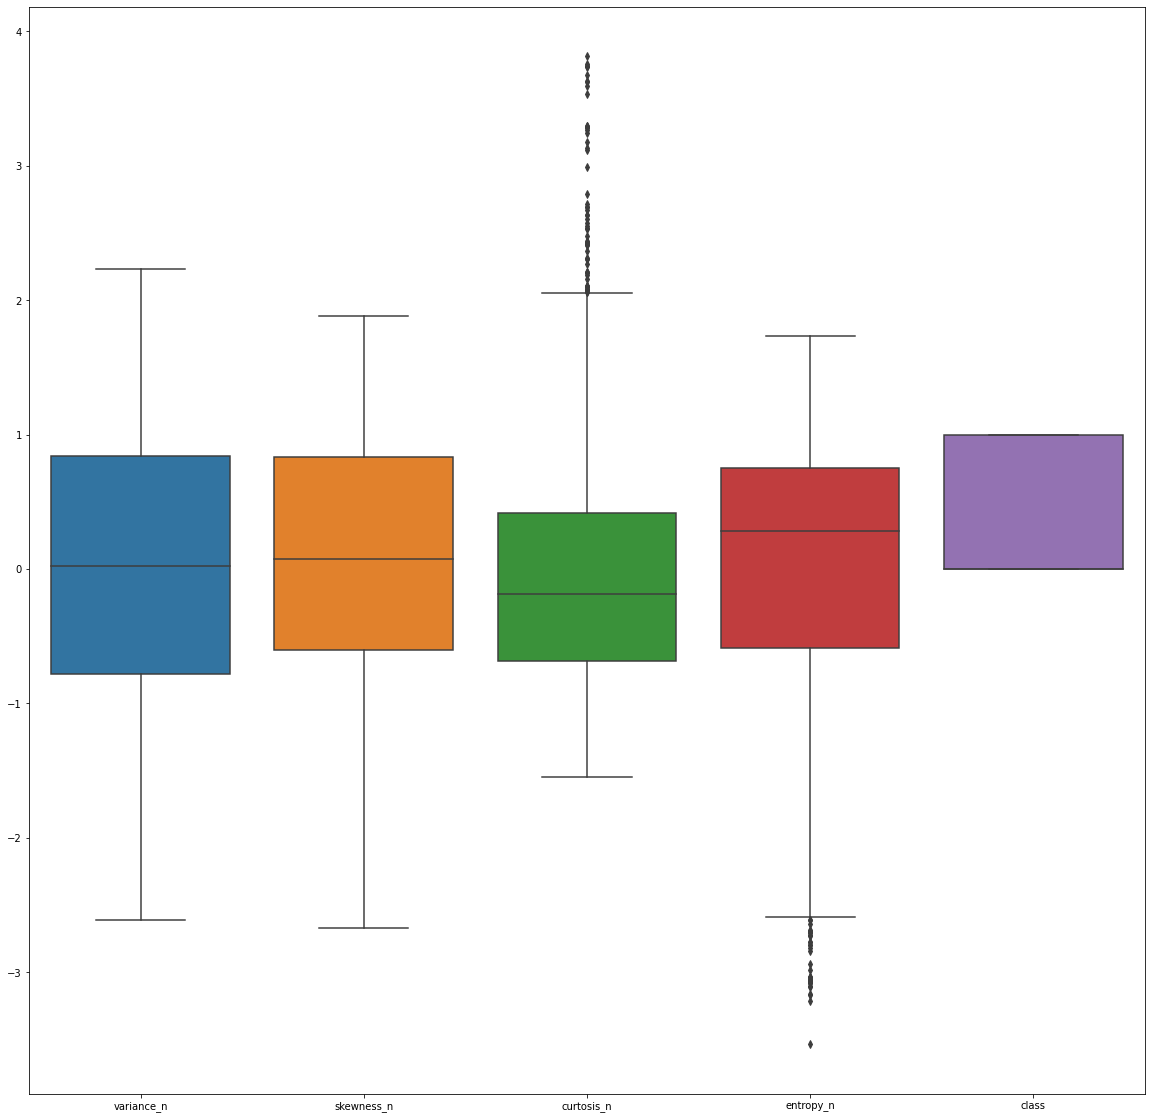

In [57]:
fig ,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [58]:
#Extracting independent and dependent features 
#Here depending feature is actual_productivity
df_new = df_new.sample(frac = 1)
x = df_new.iloc[:,:-1]  #Independent features
y = df_new.iloc[:,-1] #Dependent feature

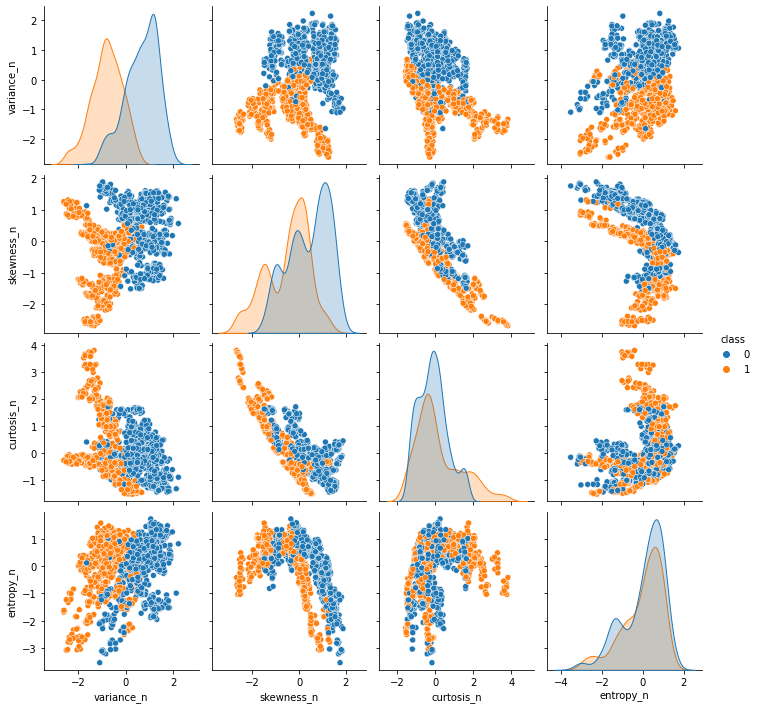

In [59]:
sns.pairplot(df_new,hue='class')

In [60]:
x

,variance_n,skewness_n,curtosis_n,entropy_n
647,1.164312,0.113683,-0.023976,0.831407
474,0.746065,1.336871,-1.060095,-0.875885
900,-0.385432,-0.802719,0.530899,1.038461
577,1.205214,-1.141574,0.457869,0.302607
347,1.007408,-0.169802,0.038588,0.748957
...,...,...,...,...
1201,-0.460785,-0.330940,-0.373173,0.827686
68,0.193899,1.001186,-0.391780,-0.715329
228,0.934755,-0.859837,0.118364,0.380718
79,0.239587,0.350281,0.458446,0.964689


In [61]:
y

647     0
474     0
900     1
577     0
347     0
       ..
1201    1
68      0
228     0
79      0
1261    1
Name: class, Length: 1348, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [64]:
x_train

,variance_n,skewness_n,curtosis_n,entropy_n
460,0.181618,1.104856,-0.641022,-0.142476
1298,-0.491279,0.134148,-1.048012,-0.068742
376,0.972618,1.010354,-1.143244,-0.022239
1109,-0.298422,0.202546,-1.010607,-0.728944
1107,0.270360,0.032233,-1.064831,0.621869
...,...,...,...,...
666,0.272595,-0.172622,1.003433,0.504705
1038,-0.403246,-1.272746,0.608711,0.993209
231,-0.971700,1.712736,0.385809,-2.049396
828,-1.060805,-0.343281,-0.030907,1.059560


In [65]:
y_train

460     0
1298    1
376     0
1109    1
1107    1
       ..
666     0
1038    1
231     0
828     1
354     0
Name: class, Length: 1078, dtype: int64

In [66]:
x_test

,variance_n,skewness_n,curtosis_n,entropy_n
176,-0.089062,1.230389,-1.187187,-2.231047
398,1.378989,-0.264298,0.145095,1.135787
817,-1.059687,0.333361,-0.403658,-0.053209
1318,-0.327847,0.196207,-0.750671,-0.798364
1080,-0.250258,0.231462,-1.148188,-0.920519
...,...,...,...,...
1303,-1.528337,-1.361592,2.005890,0.073835
1324,-0.133871,0.173987,-1.145993,-0.721514
528,1.110276,-0.076362,-0.014666,1.484801
1009,-1.403149,-2.453948,3.113075,0.334843


In [67]:
y_test

176     0
398     0
817     1
1318    1
1080    1
       ..
1303    1
1324    1
528     0
1009    1
38      0
Name: class, Length: 270, dtype: int64

# Logistic Regression 

In [68]:
sample, features = x_train.shape

In [69]:
sample

1078

In [70]:
features

4

In [71]:
#Initializing parameters
weights = np.ones(features)

#Hyperparameters
learning_rate = 0.001
iters = 1000

In [72]:
weights

array([1., 1., 1., 1.])

In [73]:
sigmoid = 1 / (1 + np.exp(-x))

In [74]:
sigmoid

,variance_n,skewness_n,curtosis_n,entropy_n
647,0.762115,0.528390,0.494006,0.696652
474,0.678321,0.791975,0.257291,0.294031
900,0.404818,0.309444,0.629693,0.738553
577,0.769451,0.242032,0.612508,0.575080
347,0.732513,0.457651,0.509646,0.678951
...,...,...,...,...
1201,0.386800,0.418012,0.407775,0.695865
68,0.548323,0.731292,0.403289,0.328422
228,0.718039,0.297373,0.529556,0.594046
79,0.559612,0.586686,0.612646,0.724060


In [75]:
model = np.dot(x_train, weights)      

In [76]:
model

array([ 0.50297579, -1.47388508,  0.81748841, ..., -0.92255115,
       -0.37543307, -0.24082588])

In [77]:
y_pred = 1 / (1 + np.exp(-model))

In [78]:
y_pred

array([0.6231584 , 0.18635282, 0.69370294, ..., 0.28443836, 0.40722886,
       0.44008283])

In [79]:
y_pred_list = []
for i in y_pred:
    if i > 0.5:
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

In [80]:
y_pred_final = np.array(y_pred_list)

In [107]:

weights = np.ones(features)
e = 0

for i in range(iters):
    w1_list = []

    model = np.dot(x_train, weights)      # wt.x
    y_pred = 1 / (1 + np.exp(-model)) + e    #sigmoid func
    
    w1 = (1/sample)*np.dot(x_train.T, (y_pred - y_train))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_list.append(w1)
    
    weights -= weights*w1


In [108]:
w1_list

[array([ 3.37317044e-01,  1.63259051e-01, -8.89826246e-17,  4.93099418e-02])]

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [110]:
y_train

460     0
1298    1
376     0
1109    1
1107    1
       ..
666     0
1038    1
231     0
828     1
354     0
Name: class, Length: 1078, dtype: int64

In [111]:
y_pred_final.size

1078

In [112]:
confusion_matrix(y_train,y_pred_final)

array([[ 97, 498],
       [424,  59]], dtype=int64)

In [113]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_train,y_pred_final).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_train,y_pred_final)

{'Accuracy': 0.14471243042671614,
 'Precision': 0.1059245960502693,
 'Recall': 0.12215320910973085,
 'Specficity': 0.16302521008403362,
 'F1': 0.11346153846153846}

In [114]:
auc = roc_auc_score(y_train,y_pred_final)

In [115]:
auc

0.1425892095968822

In [90]:
fpr, tpr, thresholds  = roc_curve(y_train,y_pred_final)

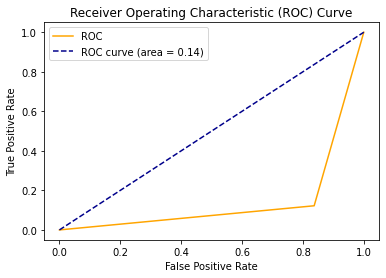

In [91]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [584]:
#For test data 

In [585]:
sample1, features1 = x_test.shape

In [586]:
sample1

270

In [587]:
features1

4

In [588]:
#Initializing parameters
weights = np.ones(features)

#Hyperparameters
learning_rate = 0.001
iters = 1000

In [589]:
weights

array([1., 1., 1., 1.])

In [590]:
model1 = np.dot(x_test, weights)

In [591]:
model1

array([ 1.90041856e+00,  9.39124952e-01, -1.09306268e+00,  8.24116416e-01,
       -2.65484287e+00,  1.52450700e+00, -1.60603210e+00,  2.69991804e+00,
        1.17979826e+00, -5.41595955e-02, -4.80032397e+00,  1.65208452e+00,
        2.34175474e+00,  8.94128849e-01,  1.12404164e+00,  6.70269722e-01,
        6.94601653e-01,  1.09652636e+00,  1.47003797e+00, -6.95659633e-01,
        1.16658881e+00,  3.76425139e-01,  4.70927420e-01,  3.78864008e-02,
        1.43296148e+00,  7.28638163e-01, -1.55486296e+00,  1.54596764e+00,
       -9.92988524e-01, -3.18052190e-02, -1.05547402e+00, -8.42179669e-01,
       -1.37201406e+00,  2.31081811e+00, -2.37513261e+00, -9.04015483e-01,
        2.39557211e+00,  2.13955133e+00, -2.31013113e+00,  3.28735156e-02,
       -1.11953605e+00, -8.11661879e-01,  9.75462191e-01, -1.03065079e+00,
        2.13070692e+00,  1.35714416e+00,  1.77001528e+00,  1.95727658e+00,
        1.17458395e+00,  2.13529016e+00, -1.05092617e+00,  1.88945314e-01,
        1.92065154e+00, -

In [592]:
y_pred1 = 1 / (1 + np.exp(-model1))

In [593]:
y_pred1

array([0.86993889, 0.71892287, 0.25104199, 0.69510944, 0.06569115,
       0.8212012 , 0.16714023, 0.93702181, 0.76491153, 0.48646341,
       0.00815995, 0.83917258, 0.91227662, 0.70974149, 0.75473763,
       0.66156355, 0.6669898 , 0.74960868, 0.81306316, 0.33277524,
       0.76252787, 0.5930106 , 0.61560324, 0.50947047, 0.80736233,
       0.67450636, 0.17438501, 0.82433057, 0.27032219, 0.49204937,
       0.25817533, 0.30107592, 0.20229464, 0.90976904, 0.08508872,
       0.28822601, 0.91648903, 0.89468834, 0.09028737, 0.50821764,
       0.24609735, 0.30753647, 0.72620689, 0.26295795, 0.8938521 ,
       0.79529516, 0.85445957, 0.87623791, 0.76397259, 0.89428618,
       0.25904729, 0.5470963 , 0.87221107, 0.07942918, 0.78926471,
       0.71372345, 0.18636189, 0.85728204, 0.39910891, 0.11545105,
       0.72014385, 0.07366733, 0.17219164, 0.91078053, 0.71281373,
       0.60659109, 0.87512991, 0.24006391, 0.73917658, 0.56697772,
       0.59545568, 0.83776732, 0.68755642, 0.58676967, 0.18060

In [594]:
y_pred1_list = []
for i in y_pred1:
    if i > 0.5:
        y_pred1_list.append(1)
    else:
        y_pred1_list.append(0)

In [595]:
len(y_pred1_list)

270

In [596]:
y_pred1_final = np.array(y_pred1_list)

In [597]:
y_pred1_final

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [598]:
weights = np.ones(features)
e = 0

for i in range(iters):
    w1_test_list = []

    model1 = np.dot(x_test, weights)      # wt.x
    y_pred1 = 1 / (1 + np.exp(-model1)) + e    #sigmoid func
    
    w1_test = (1/sample1)*np.dot(x_test.T, (y_pred1 - y_test))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_test_list.append(w1_test)
    
    weights -= weights*w1_test


In [599]:
w1_test_list

[array([3.61341539e-01, 1.42863043e-01, 8.22387426e-17, 9.81774559e-02])]

In [600]:
confusion_matrix(y_test,y_pred1_final)

array([[ 17, 132],
       [111,  10]], dtype=int64)

In [601]:
model_eval(y_test,y_pred1_final)

{'Accuracy': 0.15769944341372913,
 'Precision': 0.11131725417439703,
 'Recall': 0.12269938650306748,
 'Specficity': 0.1867572156196944,
 'F1': 0.11673151750972761}

In [602]:
auc = roc_auc_score(y_test,y_pred1_final)

In [603]:
auc

0.09836929391535856

In [604]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred1_final)

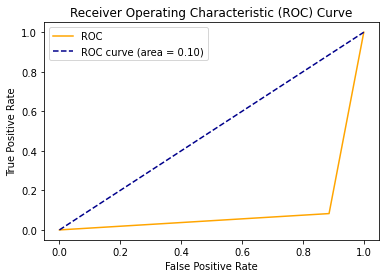

In [605]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [606]:
#Logistic regression using only 2 columns: Variance and skewness

In [728]:
df_2 = df_new[["variance_n", "skewness_n", "class"]]

In [729]:
df_2

,variance_n,skewness_n,class
93,0.699574,-1.401789,0
114,0.466699,0.853451,0
709,0.986206,0.257193,0
726,-0.141565,1.127076,0
681,0.627724,-1.031207,0
...,...,...,...
359,-0.967543,1.637283,0
682,1.147895,-0.987125,0
278,0.157139,0.999772,0
849,-0.368693,-1.007232,1


In [730]:
x = df_2.iloc[:,:-1]  #Independent features
y = df_2.iloc[:,-1] #Dependent feature

In [731]:
x

,variance_n,skewness_n
93,0.699574,-1.401789
114,0.466699,0.853451
709,0.986206,0.257193
726,-0.141565,1.127076
681,0.627724,-1.031207
...,...,...
359,-0.967543,1.637283
682,1.147895,-0.987125
278,0.157139,0.999772
849,-0.368693,-1.007232


In [732]:
y

93      0
114     0
709     0
726     0
681     0
       ..
359     0
682     0
278     0
849     1
1304    1
Name: class, Length: 1348, dtype: int64

In [733]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [734]:
sample, features = x_train.shape

In [735]:
#Initializing parameters
weights = np.ones(features)

#Hyperparameters
learning_rate = 0.001
iters = 1000

In [736]:
model3 = np.dot(x_train, weights)

In [737]:
model3

array([ 0.72357429, -0.76514356,  0.38615796, ...,  0.9578331 ,
        1.79536022, -0.53115452])

In [738]:
y_pred3 = 1 / (1 + np.exp(-model3))

In [739]:
y_pred3

array([0.67339361, 0.31753059, 0.59535747, ..., 0.72268775, 0.8575832 ,
       0.37024765])

In [740]:
y_pred3_list = []
for i in y_pred3:
    if i > 0.5:
        y_pred3_list.append(1)
    else:
        y_pred3_list.append(0)

In [741]:
y_pred3_final = np.array(y_pred3_list)

In [742]:
y_pred3_final

array([1, 0, 1, ..., 1, 1, 0])

In [743]:
weights = np.ones(features)
e = 0

for i in range(iters):
    w1_list_2 = []

    model = np.dot(x_train, weights)      # wt.x
    y_pred3 = 1 / (1 + np.exp(-model3)) + e    #sigmoid func
    
    w1 = (1/sample)*np.dot(x_train.T, (y_pred3 - y_train))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_list_2.append(w1)
    
    weights -= weights*w1

In [744]:
w1_list_2

[array([0.59187193, 0.42699046])]

In [745]:
confusion_matrix(y_train,y_pred3_final)

array([[ 78, 508],
       [429,  63]], dtype=int64)

In [746]:
model_eval(y_train,y_pred3_final)

{'Accuracy': 0.49814471243042674,
 'Precision': 0.45454545454545453,
 'Recall': 0.49796747967479676,
 'Specficity': 0.49829351535836175,
 'F1': 0.475266731328807}

In [747]:
sample4, features4 = x_test.shape

In [748]:
sample4

270

In [749]:
features4

2

In [750]:
model4 = np.dot(x_test, weights)

In [751]:
y_pred4 = 1 / (1 + np.exp(-model4))

In [752]:
y_pred4_list = []
for i in y_pred4:
    if i > 0.5:
        y_pred4_list.append(1)
    else:
        y_pred4_list.append(0)

In [753]:
len(y_pred4_list)

270

In [754]:
weights = np.ones(features4)
e = 0

for i in range(iters):
    w1_list_4 = []

    model = np.dot(x_test, weights)      # wt.x
    y_pred4 = 1 / (1 + np.exp(-model4)) + e    #sigmoid func
    
    w1 = (1/sample4)*np.dot(x_test.T, (y_pred4 - y_test))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_list_4.append(w1)
    
    weights -= weights*w1

In [755]:
w1_list_4

[array([0.37753306, 0.25497413])]

In [756]:
y_pred4_final = np.array(y_pred4_list)

In [757]:
confusion_matrix(y_test,y_pred4_final)

array([[152,   0],
       [118,   0]], dtype=int64)

In [758]:
model_eval(y_test,y_pred4_final)

{'Accuracy': 0.49814471243042674,
 'Precision': 0.45454545454545453,
 'Recall': 0.49796747967479676,
 'Specficity': 0.49829351535836175,
 'F1': 0.475266731328807}

# Naive Bayes Classifier

In [116]:
df_new = df_new.sample(frac = 1)

In [117]:
df_new

,variance_n,skewness_n,curtosis_n,entropy_n,class
1259,-0.797960,-1.398977,0.978897,0.654105,1
449,1.221002,-0.885942,0.405193,1.081230,0
847,-1.022801,-1.569989,1.253458,0.277189,1
1160,-0.712872,-1.445155,0.775194,0.107951,1
506,0.575365,1.090049,-0.321307,-1.008539,0
...,...,...,...,...,...
280,-0.082439,-0.403929,1.458547,0.996306,0
1309,-1.653734,-1.665191,2.408559,-0.349536,1
290,0.741210,0.273415,-0.184716,0.365219,0
650,-0.082065,1.282565,-0.348427,-0.330934,0


In [118]:
x, y = df_new.iloc[:, :-1], df_new.iloc[:, -1]

In [119]:
x  #Features

,variance_n,skewness_n,curtosis_n,entropy_n
1259,-0.797960,-1.398977,0.978897,0.654105
449,1.221002,-0.885942,0.405193,1.081230
847,-1.022801,-1.569989,1.253458,0.277189
1160,-0.712872,-1.445155,0.775194,0.107951
506,0.575365,1.090049,-0.321307,-1.008539
...,...,...,...,...
280,-0.082439,-0.403929,1.458547,0.996306
1309,-1.653734,-1.665191,2.408559,-0.349536
290,0.741210,0.273415,-0.184716,0.365219
650,-0.082065,1.282565,-0.348427,-0.330934


In [120]:
y   #Target

1259    1
449     0
847     1
1160    1
506     0
       ..
280     0
1309    1
290     0
650     0
555     0
Name: class, Length: 1348, dtype: int64

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [122]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1078, 4) (1078,)
(270, 4) (270,)


In [123]:
from math import e

In [142]:
class Gaussian_NB():
    
    def prior(self,x, y):                 
        c_list = []
        tm = []
        for i in y:
            c_list.append(i)
            co = 0
            c1 = 0
            for i in c_list:
                if i == 0:
                    co += 1
                else:
                    c1 +=1
        tm.append(co/len(c_list))
        tm.append(c1/len(c_list))
        self.p = np.asarray(tm)

        return self.p               #Calculation of prior probabilities 
    
    def stats(self, x, y):
        self.mu = x.groupby(y).apply(np.mean).to_numpy()
        self.sigma = x.groupby(y).apply(np.var).to_numpy()
        return self.mu, self.sigma  #Calculation of mu and sigma square for each column for both classes
    
    def pdf(self, cls, x):               #Maximum likelihood 
        mean = self.mu[cls]
        var = self.sigma[cls]
        mean = self.mu[cls]
        var = self.sigma[cls]
        e_sq_diff = (x - mean)**2
        e_power = -e_sq_diff / (2 * var) 
        pdf = e ** e_power/np.sqrt(2 * np.pi * var)
        return pdf                                      # N(x; µ, σ) = (1 / 2πσ) * (e ^ (x–µ)^2/-2σ^2            
    
    def posteri(self, x):
        post = []
        for i in range(self.c_num):
            poste = np.log(self.p[i]) + np.sum(np.log(self.pdf(i, x)))  #prior + conditional
            post.append(poste)
        #print(post)
        return self.clss[np.argmax(post)]   #class with highest posterior probabilities
     

    def model(self, x, y):
        self.feature_num = x.shape[1]
        self.clss = np.unique(y)
        self.c_num = len(self.clss)
        self.stats(x, y)
        self.prior(x, y)
        
    def predict_proba(self, x):
        preds = []
        for j in x.to_numpy():
            preds.append(self.posteri(j))
        return preds

    def accuracy_score(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy


# Training data

In [154]:
x = Gaussian_NB()

In [155]:
x.model(x_train, y_train)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [156]:
y_pred = x.predict_proba(x_train)

[-4.33299542959906, -7.009060809583139]
[-5.213051822544858, -10.490698331518997]
[-5.012132543347141, -6.403289694854401]
[-5.434570399976939, -6.988845269453994]
[-4.565564385122278, -7.542579875073802]
[-5.154314728248508, -6.154576150361123]
[-5.337918173099917, -4.4487433794308675]
[-4.788897136168811, -9.73412559983913]
[-4.322195566819642, -7.1911864139443376]
[-5.1505122646650525, -8.571918718918889]
[-5.9722565302508865, -5.639986669265344]
[-6.132863798700867, -4.953320410974483]
[-5.869493626133323, -13.946901656018888]
[-5.413984012544571, -11.736855590001772]
[-7.1447775165081, -8.777076144113344]
[-6.077175617534484, -11.023560697418388]
[-4.254986869793886, -9.17827789553212]
[-6.426815978236887, -5.67720085894245]
[-3.96405434296428, -6.007987690953488]
[-6.168871833901946, -7.655182196382546]
[-5.967770646766198, -9.0182423046846]
[-7.551685594818235, -5.395214521797076]
[-4.301932438834855, -5.043647515785879]
[-4.058596802102052, -5.857068858340015]
[-7.7227850953471

In [157]:
x.prior(x_train, y_train)

array([0.53525046, 0.46474954])

In [158]:
x.accuracy_score(y_train, y_pred)

0.8450834879406308

In [159]:
x.stats(x_train, y_train)[0]

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[ 0.65168776,  0.40585888, -0.11856824,  0.02443151],
       [-0.81553371, -0.48127704,  0.15571073, -0.0384191 ]])

# Test data

In [683]:
x.model(x_test, y_test)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [684]:
y_pred2 = x.predict_proba(x_test)

In [685]:
x.prior(x_test, y_test)

array([0.56296296, 0.43703704])

In [686]:
x.accuracy_score(y_test, y_pred2)

0.8703703703703703

# Using Column Variance and Skewness 

In [687]:
df_vs = df_new[["variance_n", "skewness_n", "class"]]

In [688]:
df_vs

,variance_n,skewness_n,class
93,0.699574,-1.401789,0
114,0.466699,0.853451,0
709,0.986206,0.257193,0
726,-0.141565,1.127076,0
681,0.627724,-1.031207,0
...,...,...,...
359,-0.967543,1.637283,0
682,1.147895,-0.987125,0
278,0.157139,0.999772,0
849,-0.368693,-1.007232,1


In [689]:
x1, y1 = df_vs.iloc[:, :-1], df_vs.iloc[:, -1]

In [690]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1 , y1 , test_size = .20 , random_state = 144)

In [691]:
x.model(x1_train, y1_train)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [692]:
y1_pred = x.predict_proba(x1_train)

In [693]:
x.accuracy_score(y1_train, y1_pred)

0.8738404452690167

In [694]:
x.model(x1_test, y1_test)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [695]:
y2_pred = x.predict_proba(x1_test)

In [696]:
x.accuracy_score(y1_test, y2_pred)

0.9111111111111111